In [12]:
from __future__ import division, print_function

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

from salishsea_tools import viz_tools, nc_tools

In [7]:
# to not render the plots in a separate window

%matplotlib inline

In [8]:
# importing the bathymetry

grid = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

In [13]:
nc_tools.show_variables(grid)

odict_keys(['nav_lon', 'nav_lat', 'Bathymetry'])


In [14]:
nc_tools.show_dimensions(grid)

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398



In [19]:
# assign python names to our variables

lats=grid.variables['nav_lat']
lons=grid.variables['nav_lon']
bathy=grid.variables['Bathymetry']

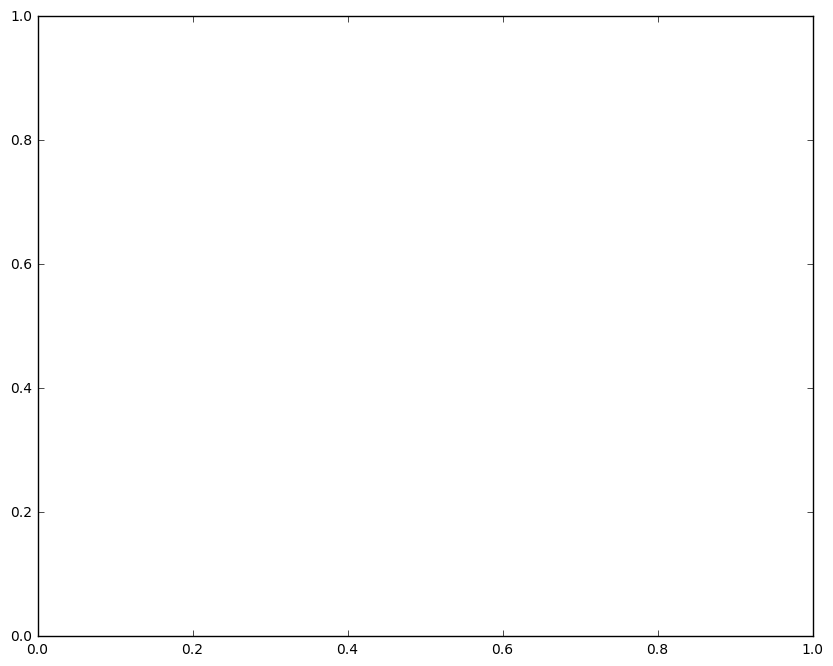

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

#the (10,8) is the (width,height) of the figure and we are using only one subplot



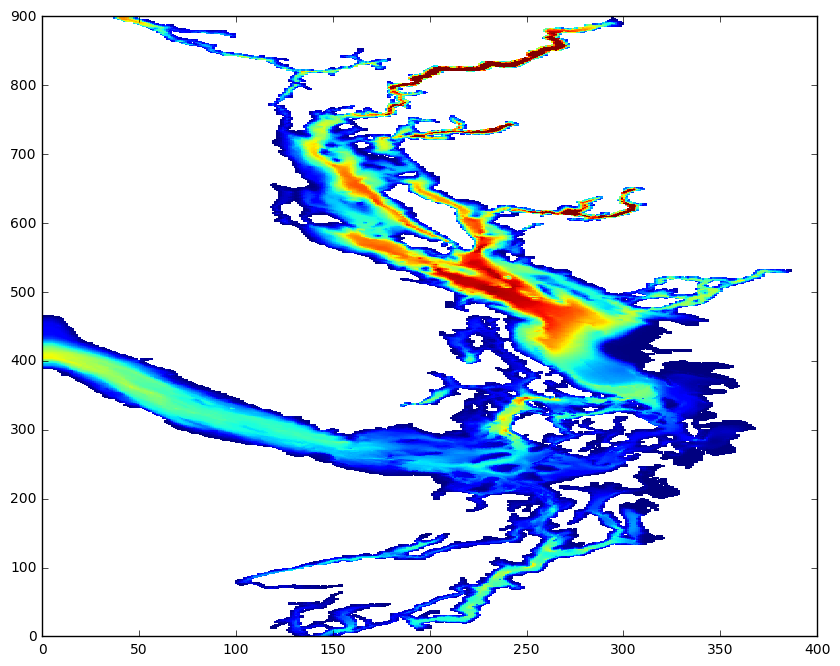

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.pcolormesh(bathy)

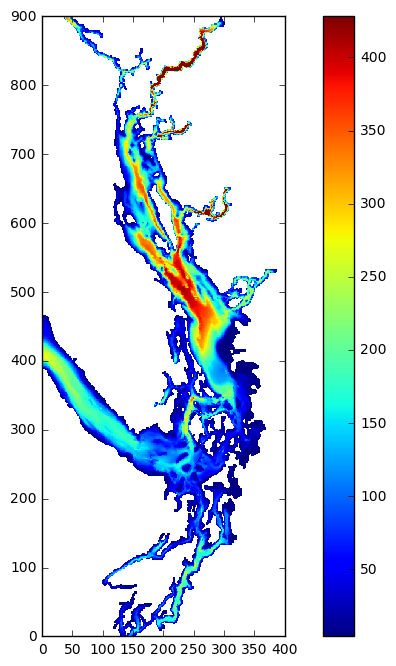

In [35]:
#now we must remove the distortion that we see in the figure compared to a salish sea map

fig,ax = plt.subplots(1, 1, figsize = (10,8))
ax.set_aspect(5/4.4)
ax.pcolormesh(bathy)
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(bathy)
fig.colorbar(mesh)

(200, 398, 250, 400)

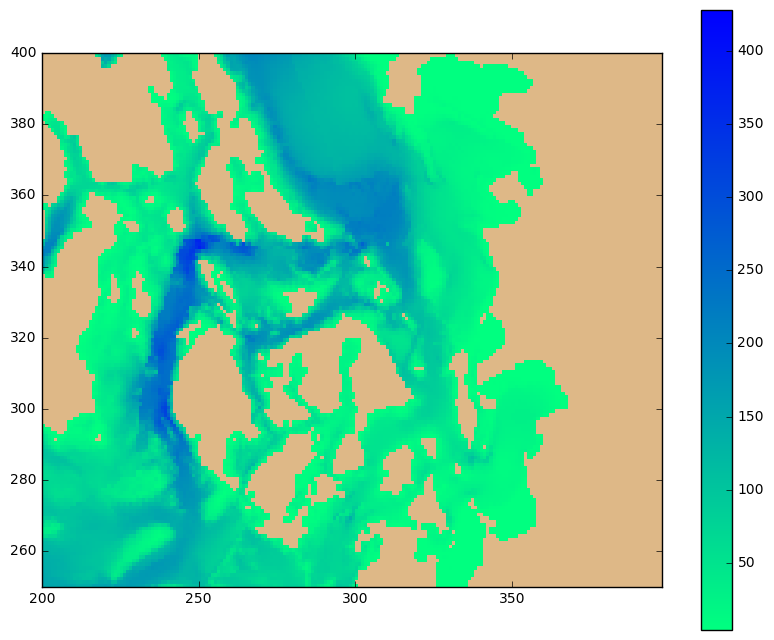

In [36]:
# to zoom in



fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
plt.axis((200, bathy.shape[1], 250, 400))



In [39]:
nc_tools.show_variable_attrs(grid)

<class 'netCDF4._netCDF4.Variable'>
float64 nav_lon(y, x)
    units: degrees east
    valid_range: [-126.40029144 -121.31835175]
    long_name: Longitude
unlimited dimensions: 
current shape = (898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 nav_lat(y, x)
    units: degrees north
    valid_range: [ 46.85966492  51.10480118]
    long_name: Latitude
unlimited dimensions: 
current shape = (898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 Bathymetry(y, x)
    _FillValue: 0.0
    least_significant_digit: 1
    units: m
    valid_range: [   0.  428.]
    long_name: Depth
    positive: down
unlimited dimensions: 
current shape = (898, 398)
filling on


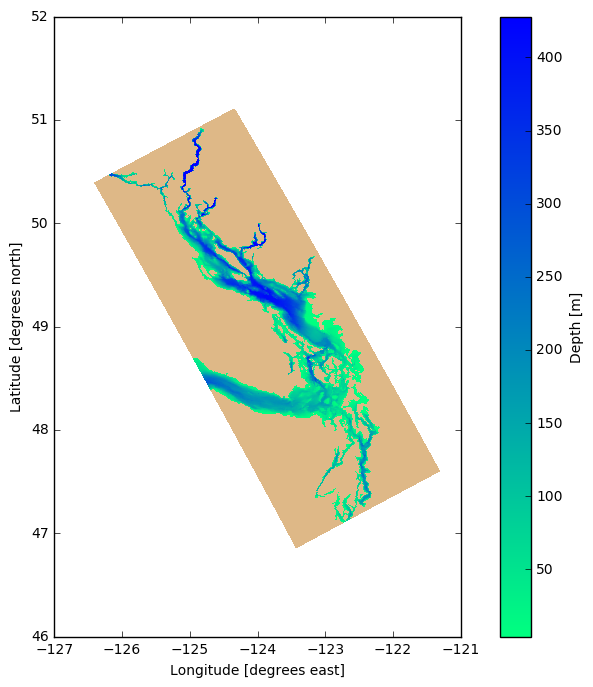

In [43]:
#plotiing on actual latitude and longitude

fig,ax = plt.subplots(1, 1, figsize = (10,8))
viz_tools.set_aspect(ax, coords = 'map', lats = lats)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(lons, lats, bathy, cmap = cmap)
cbar = fig.colorbar(mesh)


# Add axis labels
ax.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lons))
ax.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lats))
cbar.set_label('{depth.long_name} [{depth.units}]'.format(depth=bathy))

In [44]:
fig.savefig('bathy.png')

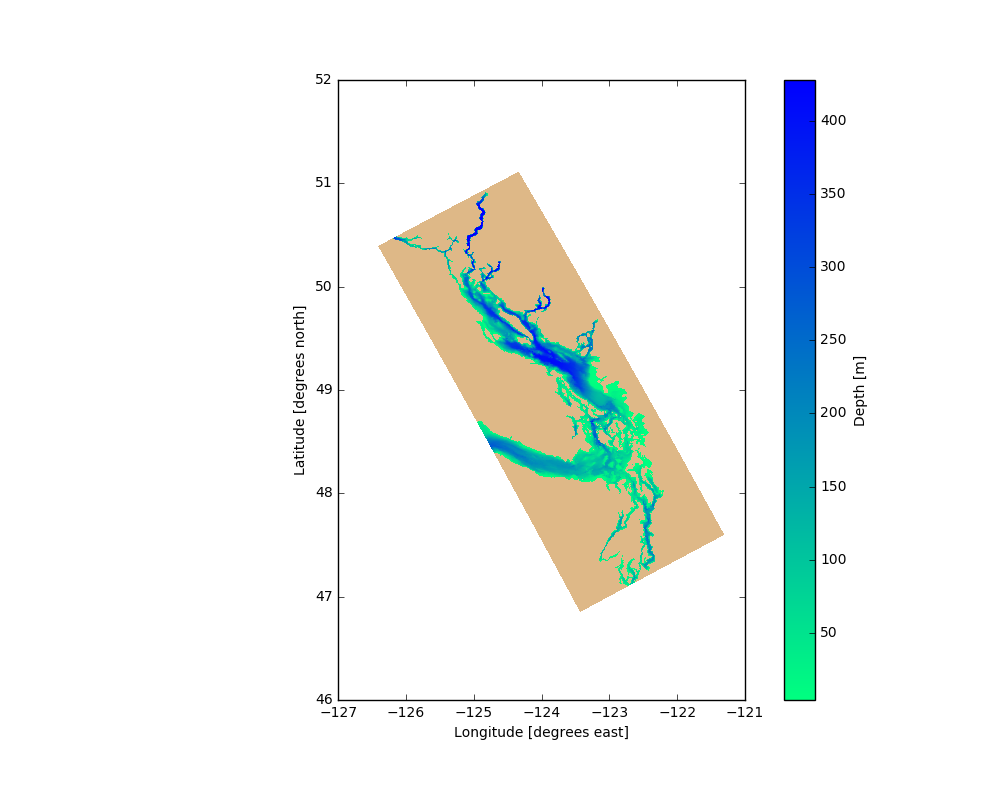

In [48]:
#to reopen it here

from IPython.display import Image
Image('bathy.png')

